# Clustering(군집분석)

기본적인 원리가 "자신과 가장 가까이 있는 것은 자신과 같은 편이다"라고 인식하여 학습하는 것이다.

K - means 군집화 실행 단계   
1) 나누고자 하는 클러스터의 갯수를 설정한다. 그 갯수만큼 임의의 초기값 생성    
2) 

장점    
적용이 쉽다.

단점   
군집 갯수를 사전에 알아야 한다.

In [1]:
library(caret)





Loading required package: lattice
Loading required package: ggplot2


In [2]:
set.seed(1234) 
data(iris)

# 데이터가 잘 정리된 데이터에만 사용할 수 있는 함수
inTrain <- createDataPartition(iris$Species, p = 0.7 , list = F) # list = F : 행렬로 생성

# 데이터 분류
training <- iris[inTrain,] # 학습용
testing <- iris[-inTrain,] # 검증용









In [4]:
# 데이터 구성 확인
summary(training)
summary(testing)





  Sepal.Length    Sepal.Width     Petal.Length   Petal.Width          Species  
 Min.   :4.400   Min.   :2.000   Min.   :1.00   Min.   :0.100   setosa    :35  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.60   1st Qu.:0.200   versicolor:35  
 Median :5.800   Median :3.000   Median :4.40   Median :1.300   virginica :35  
 Mean   :5.872   Mean   :3.046   Mean   :3.78   Mean   :1.203                  
 3rd Qu.:6.500   3rd Qu.:3.200   3rd Qu.:5.10   3rd Qu.:1.800                  
 Max.   :7.900   Max.   :4.200   Max.   :6.90   Max.   :2.500                  

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.200   Min.   :1.100   Min.   :0.100  
 1st Qu.:5.300   1st Qu.:2.700   1st Qu.:1.600   1st Qu.:0.400  
 Median :5.700   Median :3.000   Median :4.200   Median :1.300  
 Mean   :5.776   Mean   :3.084   Mean   :3.707   Mean   :1.191  
 3rd Qu.:6.300   3rd Qu.:3.400   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.700   Max.   :4.400   Max.   :6.700   Max.   :2.500  
       Species  
 setosa    :15  
 versicolor:15  
 virginica :15  
                
                
                

In [5]:
training.data <- scale(training[-5]) # 정답을 빼는 것
summary(training.data)





  Sepal.Length       Sepal.Width       Petal.Length      Petal.Width     
 Min.   :-1.70861   Min.   :-2.5024   Min.   :-1.5553   Min.   :-1.4280  
 1st Qu.:-0.89630   1st Qu.:-0.5880   1st Qu.:-1.2196   1st Qu.:-1.2985  
 Median :-0.08399   Median :-0.1094   Median : 0.3469   Median : 0.1258  
 Mean   : 0.00000   Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 0.72832   3rd Qu.: 0.3692   3rd Qu.: 0.7385   3rd Qu.: 0.7732  
 Max.   : 2.35294   Max.   : 2.7623   Max.   : 1.7455   Max.   : 1.6796  

In [6]:
# k-means 모델 생성, 비지도 학습
iris.kmeans <- kmeans(training.data, centers = 3, iter.max = 10000)  # center : 알고싶은 분류가 3개이다. / iter.max : 학습횟수

# 1 번 2번 3번의 위치 중심을 알려줌
iris.kmeans$centers





,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
1,-0.2746382,-1.100803360,0.1870153,0.1119119
2,0.9685011,-0.009222388,0.8997998,0.9237729
3,-0.9986963,0.918207552,-1.2919946,-1.2604638


In [7]:
iris.kmeans

# Clustering vector: 데이터 분류 1 2 3 으로 분류 한 결과를 나타냄





K-means clustering with 3 clusters of sizes 28, 43, 34

Cluster means:
  Sepal.Length  Sepal.Width Petal.Length Petal.Width
1   -0.2746382 -1.100803360    0.1870153   0.1119119
2    0.9685011 -0.009222388    0.8997998   0.9237729
3   -0.9986963  0.918207552   -1.2919946  -1.2604638

Clustering vector:
  1   2   3   5   6   8   9  10  11  13  19  21  22  23  26  28  29  30  31  32 
  3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3 
 33  34  35  37  38  39  40  41  42  43  44  45  47  48  50  51  52  53  55  56 
  3   3   3   3   3   3   3   3   1   3   3   3   3   3   3   2   2   2   2   1 
 58  60  61  63  64  65  66  67  68  69  71  72  73  74  75  77  78  79  81  86 
  1   1   1   1   1   1   2   1   1   1   2   1   1   1   2   2   2   1   1   2 
 87  88  90  92  93  94  95  97  99 100 101 103 104 105 106 107 108 111 113 114 
  2   1   1   2   1   1   1   1   1   1   2   2   2   2   2   1   2   2   2   1 
116 117 119 121 123 124 126 127 128 129 131 132 1

In [8]:
# 칼럼추가 -  분류된 값들 표시
training$cluster <- as.factor(iris.kmeans$cluster)
training$cluster





[1] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 2 2
 [38] 2 2 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 2 2 2 1 1 2 2 1 1 2 1 1 1 1 1 1 2 2 2 2
 [75] 2 1 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 1 2 2 2 2
Levels: 1 2 3

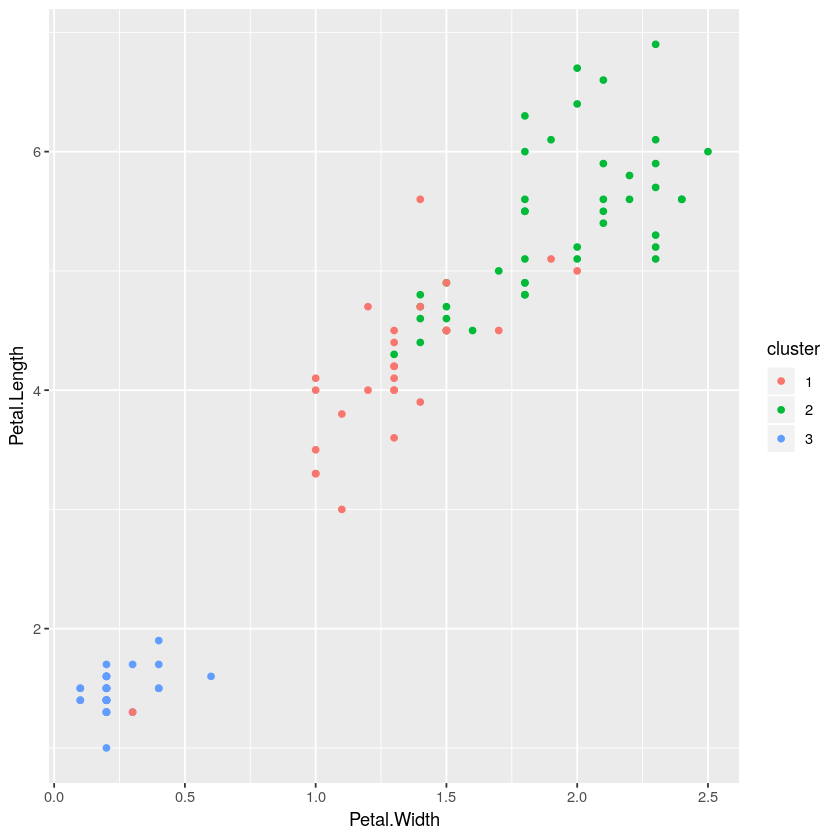

In [9]:
# 분류된 값이 뭔지 이제 드러낼 때
# 이 그래프를 확인해서 값을 정의 해 줘야 한다.
qplot(Petal.Width, Petal.Length, color = cluster, data=training)





In [21]:
# 학습용 데이터로 정확도 측정 - 클러스터 값을 문자의 값으로 변환시키는 함수 만들기
convert <- function(i){
    if(i == 1){
        return("versicolor")
    }
    else if(i == 2){
        return("virginica")
    }
    else if(i == 3){
        return("setosa")
    }
}









In [14]:
table(training$Species, training$cluster)





            
              1  2  3
  setosa      1  0 34
  versicolor 23 12  0
  virginica   4 31  0

In [22]:
# 정확도 계산을 위해 숫자 1, 2, 3 을 품종으로 변경
result <- sapply(training$cluster, convert)
mean(training$Species == result) * 100





[1] 83.80952

# 한칸에 정리하기

In [24]:
set.seed(1234) 
data(iris)

# 데이터가 잘 정리된 데이터에만 사용할 수 있는 함수
inTrain <- createDataPartition(iris$Species, p = 0.7 , list = F) # list = F : 행렬로 생성

# 데이터 분류
training <- iris[inTrain,] # 학습용
testing <- iris[-inTrain,] # 검증용

training.data <- scale(training[-5]) # 정답을 빼는 것


# k-means 모델 생성, 비지도 학습
iris.kmeans <- kmeans(training.data, centers = 3, iter.max = 10000)  # center : 알고싶은 분류가 3개이다. / iter.max : 학습횟수


# 칼럼추가 -  분류된 값들 표시
training$cluster <- as.factor(iris.kmeans$cluster)

# 학습용 데이터로 정확도 측정 - 클러스터 값을 문자의 값으로 변환시키는 함수 만들기
convert <- function(i){
    if(i == 1){
        return("versicolor")
    }
    else if(i == 2){
        return("virginica")
    }
    else if(i == 3){
        return("setosa")
    }
    
}
    
table(training$Species, training$cluster)
    
# 정확도 계산을 위해 숫자 1, 2, 3 을 품종으로 변경
result <- sapply(training$cluster, convert)
round(mean(training$Species == result) * 100, 2)

















            
              1  2  3
  setosa      1  0 34
  versicolor 23 12  0
  virginica   4 31  0

[1] 83.81

## 테스트 데이터로 진행해보기

            
              1  2  3
  setosa      0  0 15
  versicolor 15  0  0
  virginica   9  6  0

[1] 80

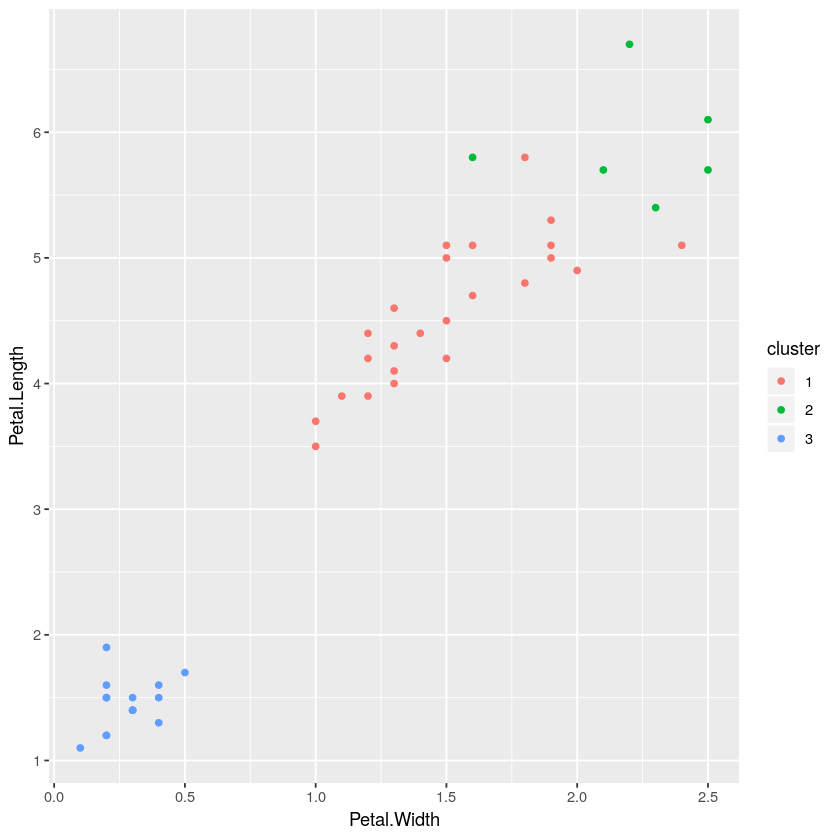

In [28]:
set.seed(1234) 
data(iris)

# 데이터가 잘 정리된 데이터에만 사용할 수 있는 함수
inTrain <- createDataPartition(iris$Species, p = 0.7 , list = F) # list = F : 행렬로 생성

# 데이터 분류
training <- iris[inTrain,] # 학습용
testing <- iris[-inTrain,] # 검증용

testing.data <- scale(testing[-5]) # 정답을 빼는 것


# k-means 모델 생성, 비지도 학습
iris.kmeans <- kmeans(testing.data, centers = 3, iter.max = 10000)  # center : 알고싶은 분류가 3개이다. / iter.max : 학습횟수


# 칼럼추가 -  분류된 값들 표시
testing$cluster <- as.factor(iris.kmeans$cluster)

# 분류된 값이 뭔지 그래프
qplot(Petal.Width, Petal.Length, color = cluster, data=testing)

# 학습용 데이터로 정확도 측정 - 클러스터 값을 문자의 값으로 변환시키는 함수 만들기
convert <- function(i){
    if(i == 1){
        return("versicolor")
    }
    else if(i == 2){
        return("virginica")
    }
    else if(i == 3){
        return("setosa")
    }
    
}
    
table(testing$Species, testing$cluster)
    
# 정확도 계산을 위해 숫자 1, 2, 3 을 품종으로 변경
result <- sapply(testing$cluster, convert)
round(mean(testing$Species == result) * 100, 2)

















# 현재는 종의 수를 알고 있지만 종을 모를 때 어떻게 할까?

### center 값을 변경하면서 그래프를 살펴보아야 함
kmeans(training.data, centers = 5, iter.max = 10000)

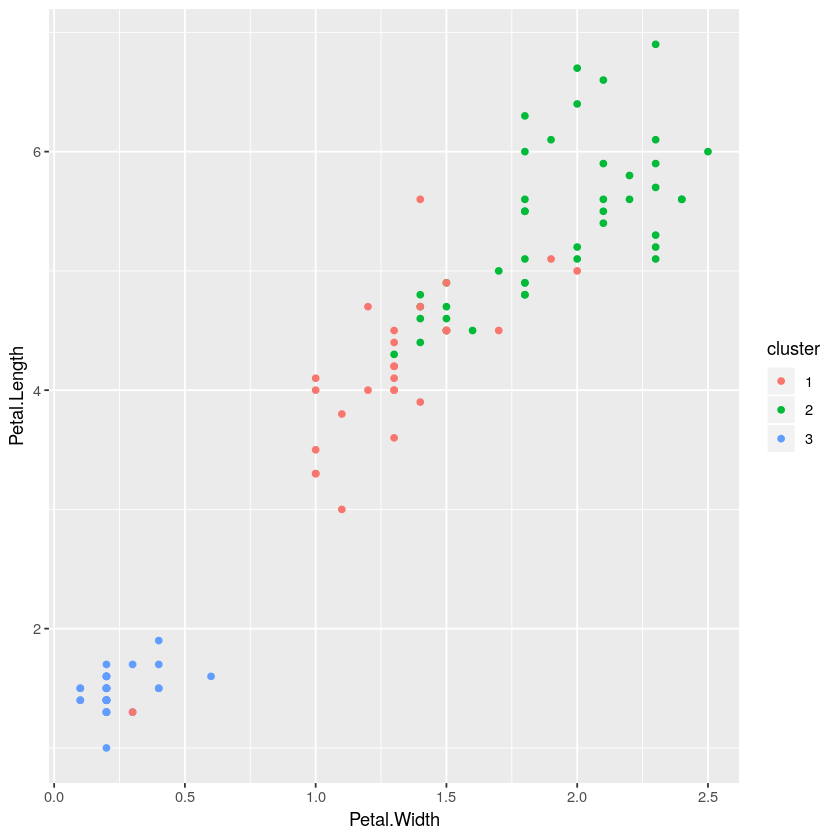

In [42]:
set.seed(1234) 
data(iris)

# 데이터가 잘 정리된 데이터에만 사용할 수 있는 함수
inTrain <- createDataPartition(iris$Species, p = 0.7 , list = F) # list = F : 행렬로 생성

# 데이터 분류
training <- iris[inTrain,] # 학습용
testing <- iris[-inTrain,] # 검증용

training.data <- scale(training[-5]) # 정답을 빼는 것


# k-means 모델 생성, 비지도 학습
iris.kmeans <- kmeans(training.data, centers = 3, iter.max = 10000)  # center : 알고싶은 분류가 3개이다. / iter.max : 학습횟수


# 칼럼추가 -  분류된 값들 표시
training$cluster <- as.factor(iris.kmeans$cluster)

# 분류된 값이 뭔지 그래프
qplot(Petal.Width, Petal.Length, color = cluster, data=training)


# # 학습용 데이터로 정확도 측정 - 클러스터 값을 문자의 값으로 변환시키는 함수 만들기
# convert <- function(i){
#     if(i == 1){
#         return("versicolor")
#     }
#     else if(i == 2){
#         return("virginica")
#     }
#     else if(i == 3){
#         return("setosa")
#     }
    
# }
    
# table(training$Species, training$cluster)
    
# # 정확도 계산을 위해 숫자 1, 2, 3 을 품종으로 변경
# result <- sapply(training$cluster, convert)
# round(mean(training$Species == result) * 100, 2)



















